<font size="4">**1. Импорт библиотек и загрузка данных**</font>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Загрузка данных (пример)
df = pd.read_excel('Свод ГО и подразделения.xlsx')  

<font size="4">**2. Предварительный анализ данных**</font> <br>
<br>
Проверим структуру данных:

In [128]:
# Сводная таблица по двум категориям
headquarters = df[df['type'] == 'Головной офис']
subdivisions = df[df['type'] != 'Головной офис']

summary_table = pd.DataFrame({
    'Категория': ['Головные офисы', 'Подразделения', 'Всего'],
    'Количество': [len(headquarters), len(subdivisions), len(df)],
    'Доля (%)': [
        round(len(headquarters)/len(df)*100, 2),
        round(len(subdivisions)/len(df)*100, 2),
        100.00
    ]
})

print("Сводная таблица:")
print(summary_table.to_string(index=False))

Сводная таблица:
     Категория  Количество  Доля (%)
Головные офисы        7909      16.2
 Подразделения       40917      83.8
         Всего       48826     100.0


In [130]:
# Сводная таблица по двум категориям
headquarters = df[df['type'] == 'Головной офис']
subdivisions = df[df['type'] != 'Головной офис']

# Создаем основную таблицу
summary_data = []

# Головные офисы - заголовок
summary_data.append({'Категория': '=== ГОЛОВНЫЕ ОФИСЫ ===', 'Количество': len(headquarters), 'Доля (%)': round(len(headquarters)/len(df)*100, 2)})

# Детализация по видам организаций для головных офисов
for tp_value, count in headquarters['tp'].value_counts().items():
    summary_data.append({'Категория': f"  {tp_value}", 'Количество': count, 'Доля (%)': round(count/len(df)*100, 2)})

# Подразделения - заголовок
summary_data.append({'Категория': '=== ПОДРАЗДЕЛЕНИЯ ===', 'Количество': len(subdivisions), 'Доля (%)': round(len(subdivisions)/len(df)*100, 2)})

# Детализация по видам организаций для подразделений
for tp_value, count in subdivisions['tp'].value_counts().items():
    summary_data.append({'Категория': f"  {tp_value}", 'Количество': count, 'Доля (%)': round(count/len(df)*100, 2)})

# Итого
summary_data.append({'Категория': '=== ВСЕГО ===', 'Количество': len(df), 'Доля (%)': 100.00})

summary_table = pd.DataFrame(summary_data)

print("Сводная таблица:")
print(summary_table.to_string(index=False))

Сводная таблица:
                                                                                                     Категория  Количество  Доля (%)
                                                                                        === ГОЛОВНЫЕ ОФИСЫ ===        7909     16.20
                                                                                                      Ломбарды        1854      3.80
                                                                         Кредитные потребительские кооперативы        1333      2.73
                                                                                       Микрокредитные компании         866      1.77
                                                                                  Операторы по приему платежей         669      1.37
                                                    Сельскохозяйственные кредитные потребительские кооперативы         501      1.03
                                                    

In [132]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48826 entries, 0 to 48825
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              46694 non-null  object 
 1   inn               48826 non-null  object 
 2   ogrn              48826 non-null  object 
 3   adr               48820 non-null  object 
 4   tp                48826 non-null  object 
 5   type              48826 non-null  object 
 6   main_name         40100 non-null  object 
 7   main_adr          40100 non-null  object 
 8   short_name        7909 non-null   object 
 9   subj_code1        7909 non-null   object 
 10  subj_code2        7909 non-null   object 
 11  found_by          48811 non-null  object 
 12  postal_code       47503 non-null  object 
 13  federal_district  48172 non-null  object 
 14  region            48826 non-null  object 
 15  area              21425 non-null  object 
 16  city              39880 non-null  object

<font size="4">**3. Группировка по федеральным округам и регионам**</font> <br>
<br>
3.1. Количество организаций по федеральным округам

In [152]:
# Создаем копию данных для работы
df_plot = df.copy()

In [154]:
# Заменяем пустые значения в federal_district на "Новые регионы"
df_plot['federal_district'] = df_plot['federal_district'].fillna('Новые регионы')

# Группировка по федеральным округам
district_stats = df_plot.groupby('federal_district', as_index=False).size().sort_values('size', ascending=False)
district_stats

,federal_district,size
7,Центральный,12403
2,Приволжский,10594
5,Сибирский,6356
8,Южный,5649
3,Северо-Западный,4423
6,Уральский,4379
0,Дальневосточный,2872
4,Северо-Кавказский,1496
1,Новые регионы,654


In [156]:
# Подсчет головных офисов и подразделений для каждого округа
headquarters_count = df_plot[df_plot['type'] == 'Головной офис'].groupby('federal_district').size()
subdivisions_count = df_plot[df_plot['type'] != 'Головной офис'].groupby('federal_district').size()

In [158]:
# Добавляем данные в таблицу
district_stats = district_stats.merge(
    headquarters_count.rename('headquarters'), 
    left_on='federal_district', 
    right_index=True, 
    how='left'
).merge(
    subdivisions_count.rename('subdivisions'), 
    left_on='federal_district', 
    right_index=True, 
    how='left'
)
district_stats

,federal_district,size,headquarters,subdivisions
7,Центральный,12403,3417,8986
2,Приволжский,10594,1161,9433
5,Сибирский,6356,928,5428
8,Южный,5649,647,5002
3,Северо-Западный,4423,620,3803
6,Уральский,4379,458,3921
0,Дальневосточный,2872,384,2488
4,Северо-Кавказский,1496,259,1237
1,Новые регионы,654,35,619


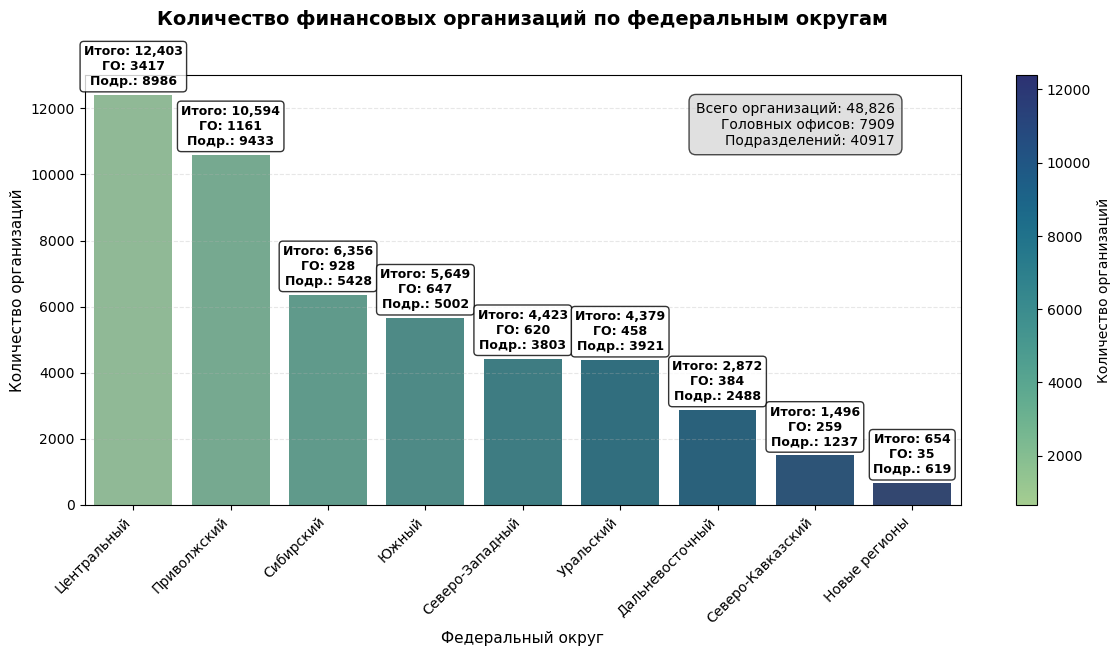

Статистика по федеральным округам:
 federal_district  size  headquarters  subdivisions
      Центральный 12403          3417          8986
      Приволжский 10594          1161          9433
        Сибирский  6356           928          5428
            Южный  5649           647          5002
  Северо-Западный  4423           620          3803
        Уральский  4379           458          3921
  Дальневосточный  2872           384          2488
Северо-Кавказский  1496           259          1237
    Новые регионы   654            35           619

Всего организаций: 48826
Головных офисов: 7909
Подразделений: 40917


In [184]:
# Нормализуем значения для цветовой шкалы (0-1)
norm = plt.Normalize(district_stats['size'].min(), district_stats['size'].max())

# Задаем явный порядок
correct_order = [
    'Центральный',
    'Приволжский', 
    'Сибирский',
    'Южный',
    'Северо-Западный',
    'Уральский',
    'Дальневосточный',
    'Северо-Кавказский',
    'Новые регионы'
]

# Создаем словарь с данными
data_dict = {}
for district in correct_order:
    data = district_stats[district_stats['federal_district'] == district].iloc[0]
    data_dict[district] = {
        'total': data['size'],
        'ho': data['headquarters'],
        'sub': data['subdivisions']
    }
    
# Визуализация (столбчатая диаграмма)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=district_stats, 
    x='federal_district', 
    y='size', 
    hue='federal_district',  
    palette="crest", 
    legend=False,            
    dodge=False,
    order=correct_order      
)

# Добавляем подписи в правильном порядке
for i, p in enumerate(ax.patches):
    district_name = correct_order[i]
    data = data_dict[district_name]
    
    ax.annotate(
        f'Итого: {data["total"]:,}\nГО: {data["ho"]}\nПодр.: {data["sub"]}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=9,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

# Добавляем цветовую шкалу
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("crest", as_cmap=True), norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Количество организаций', fontsize=10)

# Настройка внешнего вида
plt.title('Количество финансовых организаций по федеральным округам\n', 
          pad=20, fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество организаций', fontsize=11)
plt.xlabel('Федеральный округ', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Добавляем общую статистику СПРАВА
total_orgs = len(df_plot)
total_ho = len(df_plot[df_plot['type'] == 'Головной офис'])
total_sub = len(df_plot[df_plot['type'] != 'Головной офис'])

# Перемещаем блок статистики в правый верхний угол
plt.figtext(0.75, 0.75, 
           f'Всего организаций: {total_orgs:,}\nГоловных офисов: {total_ho}\nПодразделений: {total_sub}',
           fontsize=10, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7),
           ha='right')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Место для подписи внизу
plt.show()

# Выводим статистику в консоль для проверки
print("Статистика по федеральным округам:")
print(district_stats.to_string(index=False))
print(f"\nВсего организаций: {total_orgs}")
print(f"Головных офисов: {total_ho}")
print(f"Подразделений: {total_sub}")

<font size="4">**3.2. Количество организаций по регионам (ТОП-15)**</font>

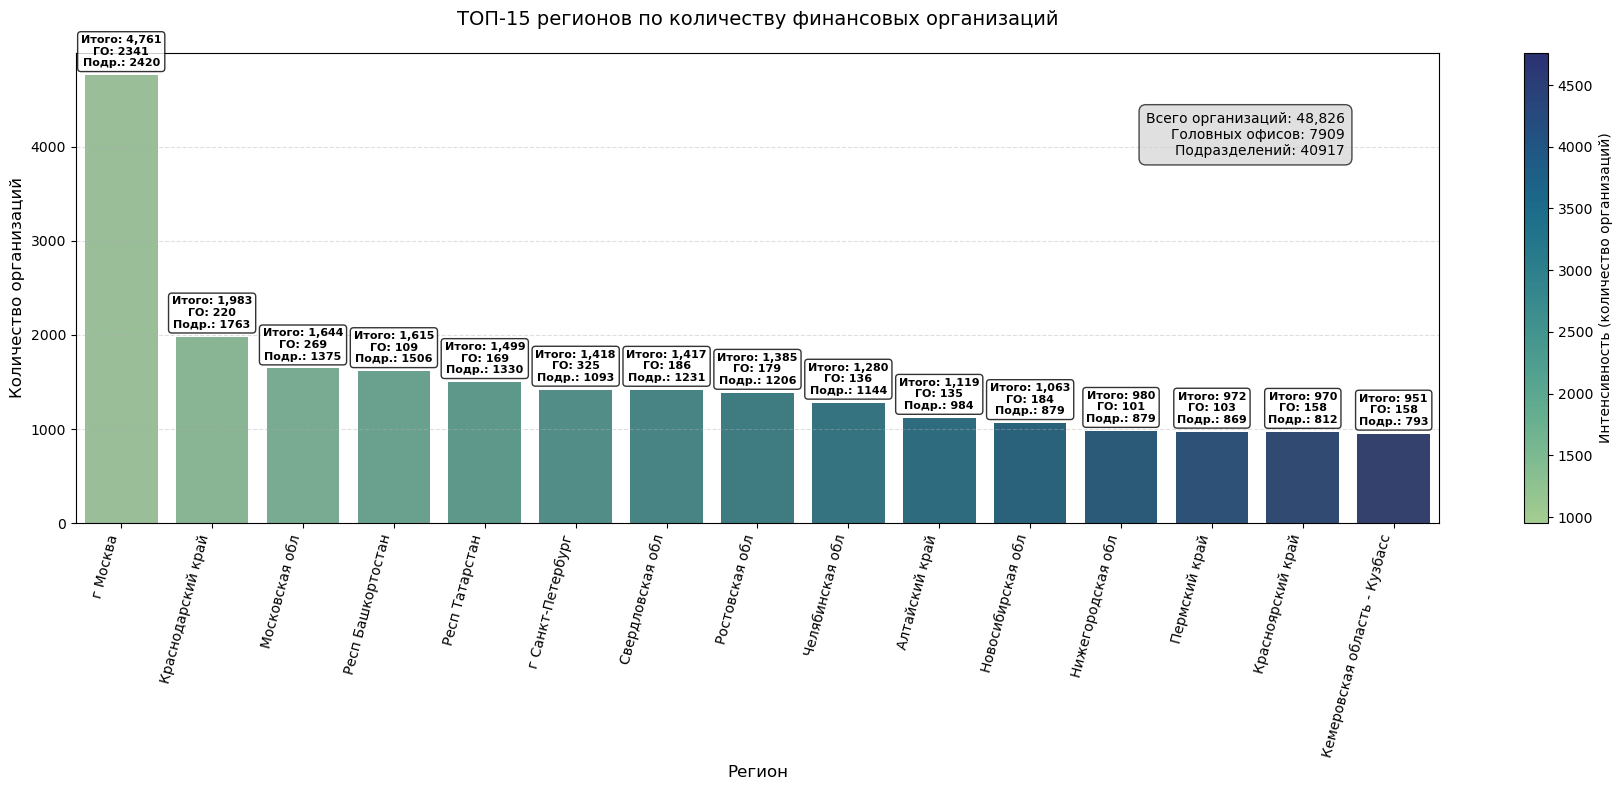

Статистика по ТОП-15 регионам:
                       region  size  headquarters  subdivisions
                     г Москва  4761          2341          2420
           Краснодарский край  1983           220          1763
               Московская обл  1644           269          1375
            Респ Башкортостан  1615           109          1506
               Респ Татарстан  1499           169          1330
            г Санкт-Петербург  1418           325          1093
             Свердловская обл  1417           186          1231
               Ростовская обл  1385           179          1206
              Челябинская обл  1280           136          1144
               Алтайский край  1119           135           984
            Новосибирская обл  1063           184           879
            Нижегородская обл   980           101           879
                Пермский край   972           103           869
            Красноярский край   970           158           812
Кемеровск

In [201]:
# Группировка по регионам
region_stats = df.groupby('region', as_index=False).size().sort_values('size', ascending=False).head(15)

# Подсчет головных офисов и подразделений для каждого региона
headquarters_count = df[df['type'] == 'Головной офис'].groupby('region').size()
subdivisions_count = df[df['type'] != 'Головной офис'].groupby('region').size()

# Добавляем данные в таблицу
region_stats = region_stats.merge(
    headquarters_count.rename('headquarters'), 
    left_on='region', 
    right_index=True, 
    how='left'
).merge(
    subdivisions_count.rename('subdivisions'), 
    left_on='region', 
    right_index=True, 
    how='left'
)

# Заполняем пропущенные значения нулями
region_stats[['headquarters', 'subdivisions']] = region_stats[['headquarters', 'subdivisions']].fillna(0).astype(int)

# Нормализуем значения для цветовой шкалы
norm = plt.Normalize(region_stats['size'].min(), region_stats['size'].max())

# Создаем словарь с данными для быстрого доступа
data_dict = {}
for _, row in region_stats.iterrows():
    data_dict[row['region']] = {
        'total': row['size'],
        'ho': row['headquarters'],
        'sub': row['subdivisions']
    }

# Визуализация
plt.figure(figsize=(18, 8))
ax = sns.barplot(
    data=region_stats, 
    x='region', 
    y='size', 
    hue='region',  
    palette=sns.color_palette("crest", n_colors=len(region_stats)),
    legend=False,
    dodge=False
)

# Добавляем подписи данных с детализацией
for i, p in enumerate(ax.patches):
    # Получаем название региона из подписи на оси X
    region_name = region_stats.iloc[i]['region']
    data = data_dict[region_name]
    
    ax.annotate(
        f'Итого: {data["total"]:,}\nГО: {data["ho"]}\nПодр.: {data["sub"]}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=8,  # Немного уменьшил шрифт для регионов
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

# Настройка внешнего вида
plt.title('ТОП-15 регионов по количеству финансовых организаций', 
          fontsize=14, pad=20)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Количество организаций', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Добавляем цветовую шкалу
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("crest", as_cmap=True), norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Интенсивность (количество организаций)', fontsize=10)

# Добавляем общую статистику СПРАВА
total_orgs = len(df)
total_ho = len(df[df['type'] == 'Головной офис'])
total_sub = len(df[df['type'] != 'Головной офис'])

# Перемещаем блок статистики в правый верхний угол
plt.figtext(0.75, 0.8, 
           f'Всего организаций: {total_orgs:,}\nГоловных офисов: {total_ho}\nПодразделений: {total_sub}',
           fontsize=10, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7),
           ha='right')

plt.tight_layout()
plt.show()

# Выводим статистику в консоль для проверки
print("Статистика по ТОП-15 регионам:")
print(region_stats.to_string(index=False))
print(f"\nВсего организаций: {total_orgs}")
print(f"Головных офисов: {total_ho}")
print(f"Подразделений: {total_sub}")

<font size="4">**3.3. Количество организаций по городам (ТОП-15)**</font>

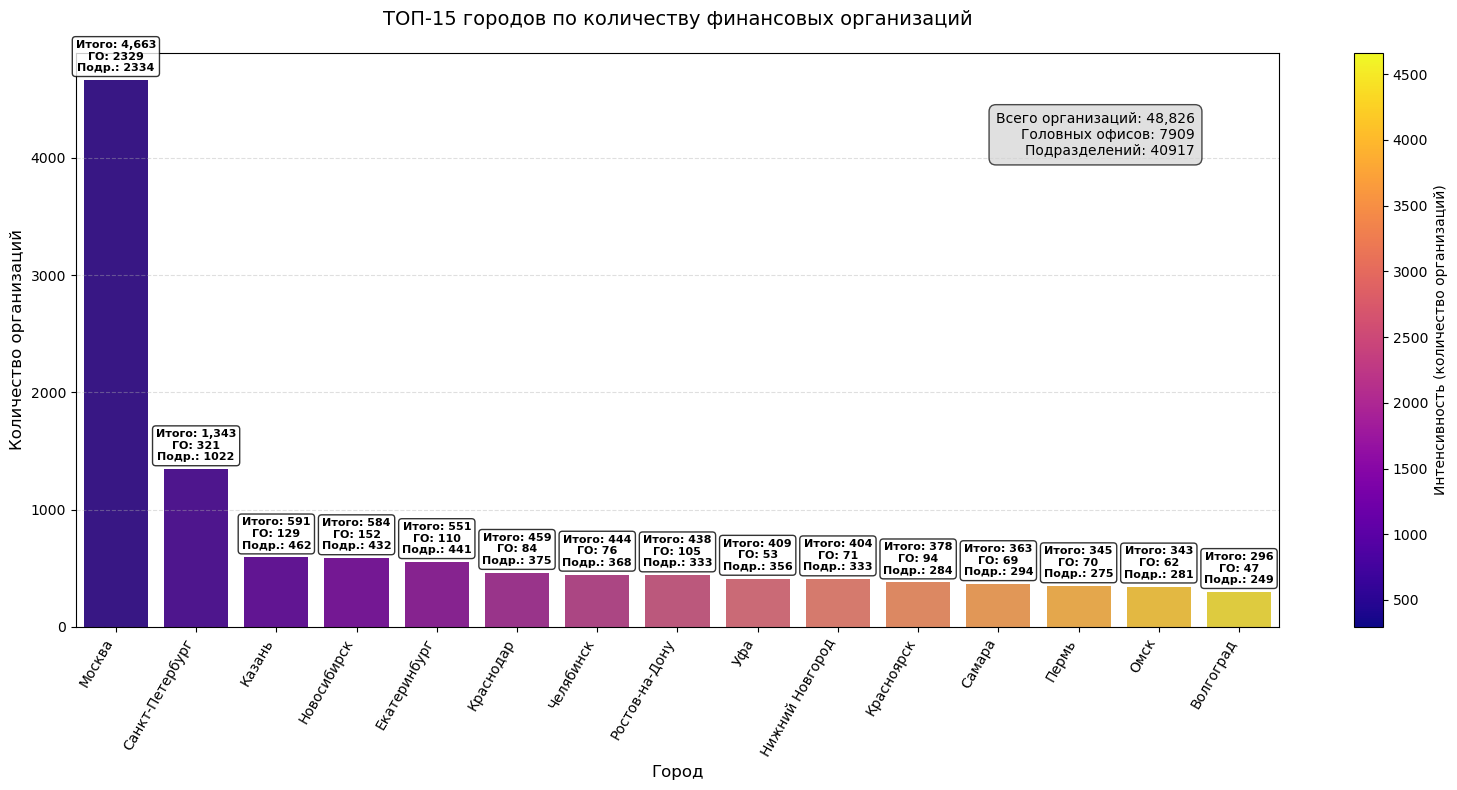

Статистика по ТОП-15 городам:
           city  size  headquarters  subdivisions
         Москва  4663          2329          2334
Санкт-Петербург  1343           321          1022
         Казань   591           129           462
    Новосибирск   584           152           432
   Екатеринбург   551           110           441
      Краснодар   459            84           375
      Челябинск   444            76           368
 Ростов-на-Дону   438           105           333
            Уфа   409            53           356
Нижний Новгород   404            71           333
     Красноярск   378            94           284
         Самара   363            69           294
          Пермь   345            70           275
           Омск   343            62           281
      Волгоград   296            47           249

Всего организаций: 48826
Головных офисов: 7909
Подразделений: 40917


In [205]:
# Группировка по городам
city_stats = df.groupby('city', as_index=False).size().sort_values('size', ascending=False).head(15)

# Подсчет головных офисов и подразделений для каждого города
headquarters_count = df[df['type'] == 'Головной офис'].groupby('city').size()
subdivisions_count = df[df['type'] != 'Головной офис'].groupby('city').size()

# Добавляем данные в таблицу
city_stats = city_stats.merge(
    headquarters_count.rename('headquarters'), 
    left_on='city', 
    right_index=True, 
    how='left'
).merge(
    subdivisions_count.rename('subdivisions'), 
    left_on='city', 
    right_index=True, 
    how='left'
)

# Заполняем пропущенные значения нулями
city_stats[['headquarters', 'subdivisions']] = city_stats[['headquarters', 'subdivisions']].fillna(0).astype(int)

# Нормализуем значения для цветовой шкалы
norm = plt.Normalize(city_stats['size'].min(), city_stats['size'].max())

# Создаем словарь с данными для быстрого доступа
data_dict = {}
for _, row in city_stats.iterrows():
    data_dict[row['city']] = {
        'total': row['size'],
        'ho': row['headquarters'],
        'sub': row['subdivisions']
    }

# Визуализация с подписями данных
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    data=city_stats, 
    x='city', 
    y='size', 
    hue='city',
    palette='plasma',
    legend=False,
    dodge=False
)

# Добавляем подписи данных с детализацией
for i, p in enumerate(ax.patches):
    # Получаем название города из данных
    city_name = city_stats.iloc[i]['city']
    data = data_dict[city_name]
    
    ax.annotate(
        f'Итого: {data["total"]:,}\nГО: {data["ho"]}\nПодр.: {data["sub"]}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=8,  # Уменьшенный шрифт для компактности
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

# Настройка внешнего вида
plt.title('ТОП-15 городов по количеству финансовых организаций', fontsize=14, pad=20)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество организаций', fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Добавляем цветовую шкалу
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Интенсивность (количество организаций)', fontsize=10)

# Добавляем общую статистику СПРАВА
total_orgs = len(df)
total_ho = len(df[df['type'] == 'Головной офис'])
total_sub = len(df[df['type'] != 'Головной офис'])

# Перемещаем блок статистики в правый верхний угол
plt.figtext(0.75, 0.8, 
           f'Всего организаций: {total_orgs:,}\nГоловных офисов: {total_ho}\nПодразделений: {total_sub}',
           fontsize=10, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7),
           ha='right')

plt.tight_layout()
plt.show()

# Выводим статистику в консоль для проверки
print("Статистика по ТОП-15 городам:")
print(city_stats.to_string(index=False))
print(f"\nВсего организаций: {total_orgs}")
print(f"Головных офисов: {total_ho}")
print(f"Подразделений: {total_sub}")

<font size="4">**4. Анализ распределения по видам участников (ТОП-15)**</font><br>
<br>
Круговые диаграммы по типам организаций

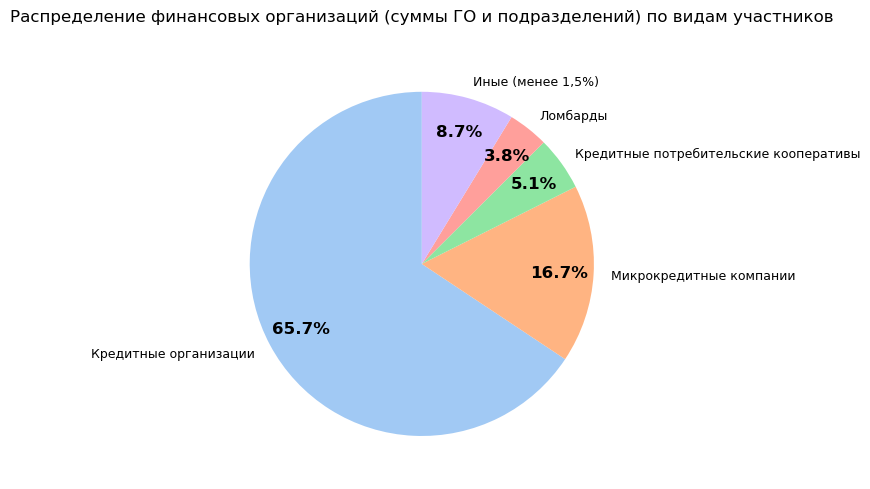

In [235]:
# Группировка по типам участников
tp_stats = df['tp'].value_counts().reset_index()
tp_stats.columns = ['type', 'count']

# Разделяем на основные категории и "Иные"
threshold = 0.015  # 1,5% порог
main_categories = tp_stats[tp_stats['count'] / tp_stats['count'].sum() >= threshold]
other_categories = tp_stats[tp_stats['count'] / tp_stats['count'].sum() < threshold]

# Создаем новую строку для "Иные"
other_sum = other_categories['count'].sum()
other_list = other_categories['type'].tolist()

# Формируем итоговый датафрейм
final_stats = pd.concat([
    main_categories,
    pd.DataFrame({'type': ['Иные (менее 1,5%)'], 'count': [other_sum]})
])

# Визуализация (круговая диаграмма)
plt.figure(figsize=(12, 5))
wedges, texts, autotexts = plt.pie(
    final_stats['count'],
    labels=final_stats['type'],
    autopct=lambda p: f'{p:.1f}%' if p >= threshold*100 else '',
    startangle=90,
    pctdistance=0.8,
    textprops={'fontsize': 9},
    colors=sns.color_palette('pastel', n_colors=len(final_stats))
)

# Улучшаем отображение текста
for text in texts:
    text.set_fontsize(9)
    
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

plt.title('Распределение финансовых организаций (суммы ГО и подразделений) по видам участников', pad=20, fontsize=12)
plt.tight_layout()
plt.show()

<font size="4">**5. Тепловая карта по ФО (анализ плотности)**</font>


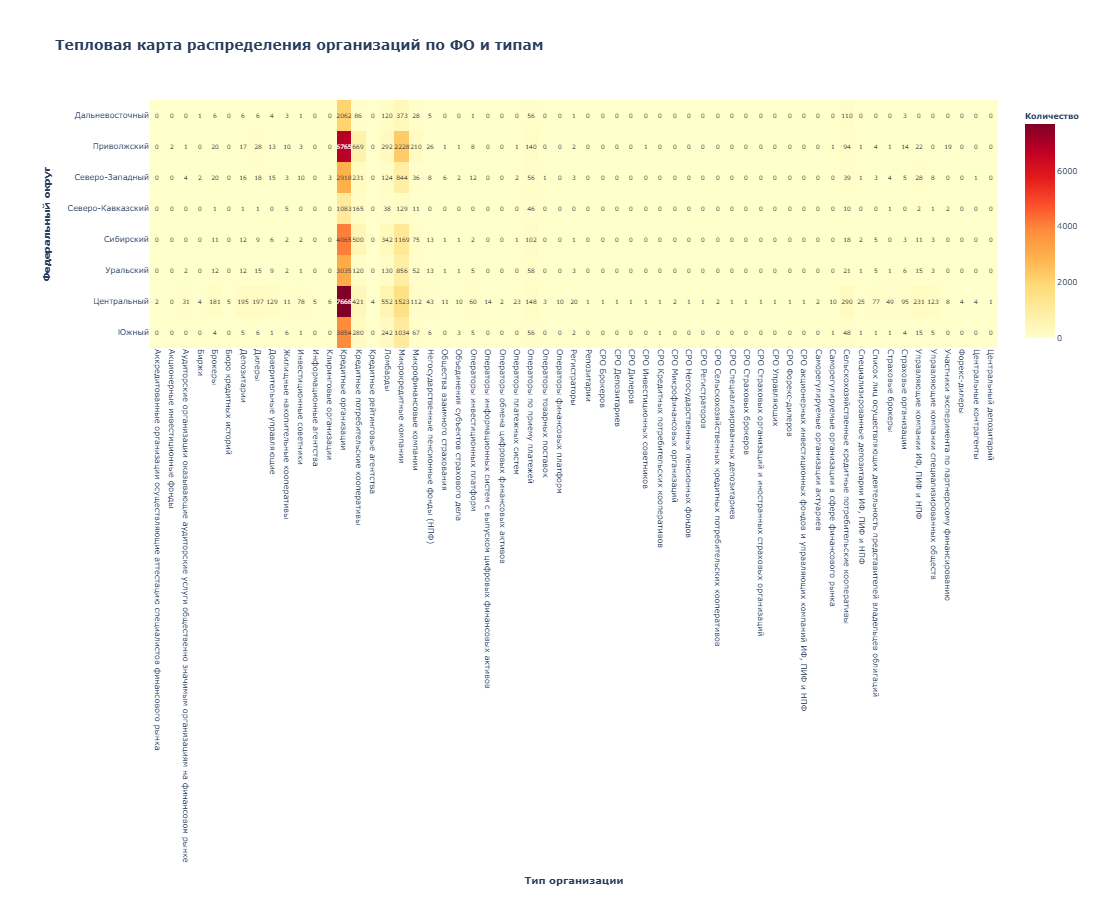

In [242]:
import plotly.express as px
import pandas as pd

# Создаем сводную таблицу
pivot_table = df.pivot_table(index='federal_district', columns='tp', aggfunc='size', fill_value=0)

# Создаем интерактивную тепловую карту с увеличенными цифрами
fig = px.imshow(
    pivot_table,
    color_continuous_scale='YlOrRd',
    labels=dict(x="Тип организации", y="Федеральный округ", color="Количество"),
    title='<b>Тепловая карта распределения организаций по ФО и типам</b>',
    width=1200,  # Ширина графика
    height=800 + len(pivot_table)*10,  # Автоподбор высоты по количеству регионов
    text_auto=True,  # Автоматические подписи значений
    aspect="auto"  # Автоматическое соотношение сторон
)

# Настраиваем отображение с увеличенными цифрами
fig.update_layout(
    font=dict(size=8),  # Размер основного шрифта
    title_font=dict(size=14),  # Размер заголовка
    xaxis=dict(
        title='<b>Тип организации</b>',
        tickangle=90,
        tickfont=dict(size=8)  # Размер шрифта меток оси X
    ),
    yaxis=dict(
        title='<b>Федеральный округ</b>',
        tickfont=dict(size=8)  # Размер шрифта меток оси Y
    ),
    coloraxis_colorbar=dict(
        title='<b>Количество</b>',
        title_font=dict(size=8)
    ),
    margin=dict(l=150, r=50, t=100, b=150),  # Отступы для меток
)

# Увеличиваем размер цифр в ячейках
fig.update_traces(
    textfont=dict(size=6),  # Размер цифр в ячейках
    hovertemplate="<b>ФО:</b> %{y}<br><b>Тип:</b> %{x}<br><b>Количество:</b> %{z}<extra></extra>"
)

# Настраиваем автоматическое масштабирование
fig.update_layout(autosize=True)

fig.show()

<font size="4">**5. Тепловая карта в разрезе федеральных округов по регионам (анализ плотности)**</font>

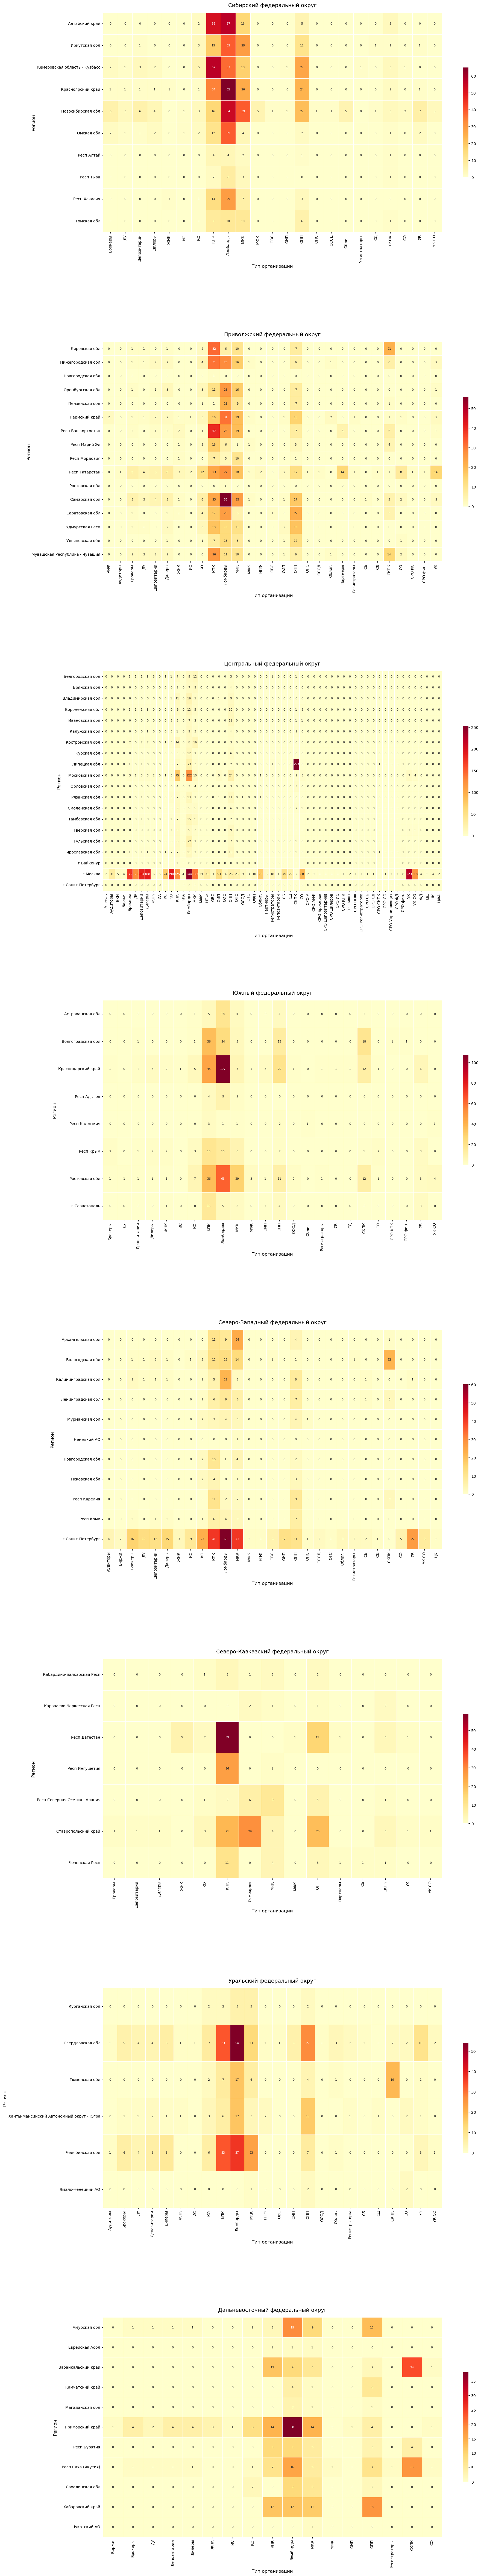

In [244]:
# Получаем список федеральных округов (исключая NaN)
federal_districts = [d for d in df['federal_district'].unique() if pd.notna(d)]

# Создаем фигуру с одним столбцом подграфиков
fig, axes = plt.subplots(len(federal_districts), 1, figsize=(20, 15*len(federal_districts)))

# Если только один округ, преобразуем axes в массив
if len(federal_districts) == 1:
    axes = [axes]

# Настраиваем общие отступы
plt.subplots_adjust(hspace=0.5)  # Вертикальный отступ между графиками

for i, district in enumerate(federal_districts):
    ax = axes[i]
    
    # Фильтруем данные по округу
    district_df = df[df['federal_district'] == district]
    
    # Проверяем наличие данных
    if len(district_df) == 0:
        ax.axis('off')
        continue
    
    # Создаем сводную таблицу
    try:
        pivot_table = district_df.pivot_table(
            index='region', 
            columns='short_name', 
            aggfunc='size', 
            fill_value=0
        )
        
        # Тепловая карта с настройками
        sns.heatmap(
            pivot_table, 
            cmap='YlOrRd',
            annot=True,
            fmt='d',
            linewidths=0.5,
            cbar_kws={'shrink': 0.5},
            annot_kws={'size': 8},
            ax=ax
        )
        
        # Настройка подписей
        ax.set_title(f'{district} федеральный округ', pad=15, fontsize=14)
        ax.set_xlabel('Тип организации', fontsize=12)
        ax.set_ylabel('Регион', fontsize=12)
        annot_kws={'size': 12}
        
        # Поворот подписей
        ax.tick_params(axis='x', rotation=90, labelsize=10)
        ax.tick_params(axis='y', rotation=0, labelsize=10)
        
    except Exception as e:
        print(f"Ошибка при обработке округа {district}: {str(e)}")
        ax.axis('off')
        continue

plt.show()

<font size="4">**6. Выявления 20 самых популярных адресов расположения финансовых организаций**</font>

In [270]:
# Создаем столбец с полным адресом
df['full_address'] = (df['federal_district'] + ', ' + df['region'] + ', ' + df['city'] + ', ' + df['street'] + ', ' + df['house'].astype(str))

In [272]:
# Группируем по адресу и считаем количество организаций
address_counts = df.groupby('full_address').agg(
    org_count=('name', 'count'),
    org_types=('tp', lambda x: ', '.join(sorted(set(x)))),
    example_name=('name', 'first')
).sort_values('org_count', ascending=False).head(20)

In [274]:
# Добавляем координаты для топ-20 адресов
top_addresses = address_counts.reset_index().merge(
    df.drop_duplicates('full_address')[['full_address', 'geo_lat', 'geo_lon']],
    on='full_address',
    how='left'
)

In [280]:
# Визуализация на карте
import folium

# Создаем карту с центром в средних координатах
map_center = [df['geo_lat'].mean(), df['geo_lon'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Добавляем маркеры для топ-20 адресов
for idx, row in top_addresses.iterrows():
    # Получаем все организации для данного адреса
    address_orgs = df[df['full_address'] == row['full_address']]
    
    # Формируем HTML для списка организаций
    orgs_list_html = "<ul style='max-height: 200px; overflow-y: auto;'>"
    for i, org in enumerate(address_orgs.itertuples(), 1):
        orgs_list_html += f"""
        <li style='margin-bottom: 10px;'>
            <b>{i}. {org.name}</b><br>
            ИНН: {org.inn}<br>
            ОГРН: {org.ogrn}<br>
            Тип: {org.type}
        </li>
        """
    orgs_list_html += "</ul>"
    
    popup_text = f"""
    <b>Адрес:</b> {row['full_address']}<br>
    <b>Кол-во организаций:</b> {row['org_count']}<br>
    <b>Типы организаций:</b> {row['org_types']}<br>
    <b>Список организаций:</b><br>
    {orgs_list_html}
    """
    
    folium.CircleMarker(
        location=[row['geo_lat'], row['geo_lon']],
        radius=row['org_count']*0.5,  # Масштабируем размер по количеству
        popup=folium.Popup(popup_text, max_width=400),
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(m)

In [288]:
# Сохраняем карту
m.save('top_addresses_map.html')
print("Топ-20 адресов:")
print("\nКарта сохранена как 'top_addresses_map.html'")

# Создаем расширенную статистику
print("=" * 80)
print("АНАЛИТИЧЕСКИЙ ОТЧЕТ ПО ТОП-20 АДРЕСАМ")
print("=" * 80)

# Общая статистика
total_orgs = top_addresses['org_count'].sum()
unique_types = df['type'].nunique()
print(f"Общее количество организаций в топ-20 адресах: {total_orgs}")
print(f"Уникальных типов организаций: {unique_types}")
print("-" * 80)

# Детальная статистика по адресам
print("\nТОП-20 АДРЕСОВ ПО КОЛИЧЕСТВУ ОРГАНИЗАЦИЙ:")
print("-" * 80)

for i, (idx, row) in enumerate(top_addresses.iterrows(), 1):
    print(f"{i:2d}. {row['full_address']}")
    print(f"   Организаций: {row['org_count']} | Типы: {row['org_types']}")
    print()

# Статистика по типам организаций
print("-" * 80)
print("СТАТИСТИКА ПО ТИПАМ ОРГАНИЗАЦИЙ:")
print("-" * 80)

type_stats = df['type'].value_counts().head(10)
for type_name, count in type_stats.items():
    percentage = (count / len(df)) * 100
    print(f"{type_name:<30}: {count:>4} ({percentage:.1f}%)")

# Географическая статистика
print("-" * 80)
print("ГЕОГРАФИЧЕСКАЯ СТАТИСТИКА:")
print("-" * 80)
print(f"Общий охват: {len(df)} организаций")
print(f"Адресов с координатами: {df[['geo_lat', 'geo_lon']].notna().all(axis=1).sum()}")
print(f"Диапазон широт: {df['geo_lat'].min():.4f} - {df['geo_lat'].max():.4f}")
print(f"Диапазон долгот: {df['geo_lon'].min():.4f} - {df['geo_lon'].max():.4f}")

# Дополнительные опции
print("-" * 80)
print("ДОПОЛНИТЕЛЬНЫЕ ОПЦИИ:")
print("-" * 80)
print("1. Карта содержит интерактивные маркеры с полной информацией")
print("2. При клике на маркер отображается список всех организаций")
print("3. Размер маркера пропорционален количеству организаций")

Топ-20 адресов:

Карта сохранена как 'top_addresses_map.html'
АНАЛИТИЧЕСКИЙ ОТЧЕТ ПО ТОП-20 АДРЕСАМ
Общее количество организаций в топ-20 адресах: 420
Уникальных типов организаций: 6
--------------------------------------------------------------------------------

ТОП-20 АДРЕСОВ ПО КОЛИЧЕСТВУ ОРГАНИЗАЦИЙ:
--------------------------------------------------------------------------------
 1. Центральный, г Москва, Москва, Пресненская наб, 12
   Организаций: 50 | Типы: Брокеры, Депозитарии, Дилеры, Доверительные управляющие, Инвестиционные советники, Кредитные организации, Кредитные потребительские кооперативы, Микрокредитные компании, Негосударственные пенсионные фонды (НПФ), Операторы инвестиционных платформ, Список лиц осуществляющих деятельность представителей владельцев облигаций, Управляющие компании ИФ, ПИФ и НПФ, Управляющие компании специализированных обществ

 2. Центральный, г Москва, Москва, Пресненская наб, 10
   Организаций: 44 | Типы: Брокеры, Депозитарии, Дилеры, Доверитель

In [290]:
m